In [2]:
import matplotlib.pyplot as plt
import cv2
import time
from darkflow.net.build import TFNet


%config InlineBackend.figure_format = 'svg'

c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\aayush\anaconda3\envs\objdet\lib\site-packages\tensorflow\

In [3]:
options = {
    'model': 'cfg/yolov2-tiny.cfg',
    'load' : 'bin/yolov2-tiny.weights',
    'threshold':0.2,
    }
tfnet = TFNet(options)
def timer():
   now = time.localtime(time.time())
   return now[5]

Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny.cfg
Loading bin/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.011981964111328125s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  lea

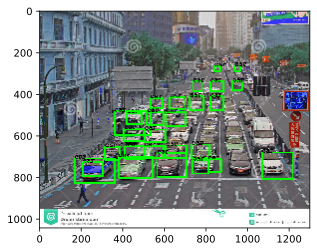

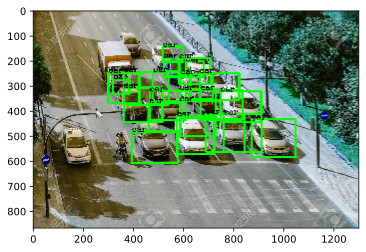

27 22
TrafficLight1 :GREEN
Traffic Light2 :RED


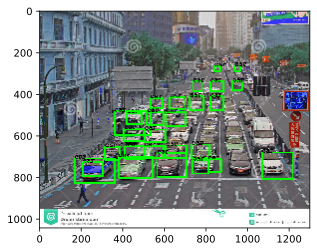

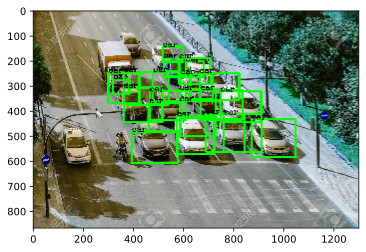

27 22
TrafficLight1 :GREEN
Traffic Light2 :RED


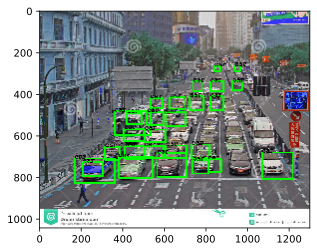

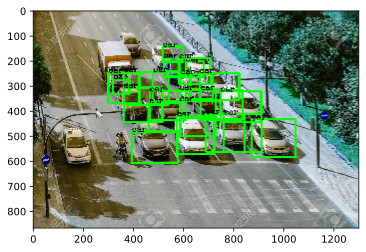

27 22
TrafficLight1 :GREEN
Traffic Light2 :RED


KeyboardInterrupt: 

In [4]:
while 1:    
    img = cv2.imread('car4.jpg')
    result = tfnet.return_predict(img)
    #print(result)
    CarCount = 0
    for i in range(0,len(result)):
        tl = (result[i]['topleft']['x'],result[i]['topleft']['y'])
        br = (result[i]['bottomright']['x'],result[i]['bottomright']['y'])# gives the topleft and bottom right coordinates
        label = result[i]['label']
        if label == "car":
            #print(tl,br)
            img = cv2.rectangle(img, tl, br,(0,255,0),7) #draw a green rectangle
            img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
            CarCount += 1
            plt.imshow(img)
    plt.show()
    img = cv2.imread('car3.jpg')
    result = tfnet.return_predict(img)
    #print(result)
    CarCount2 = 0
    for i in range(0,len(result)):
        tl = (result[i]['topleft']['x'],result[i]['topleft']['y'])
        br = (result[i]['bottomright']['x'],result[i]['bottomright']['y'])# gives the topleft and bottom right coordinates
        label = result[i]['label']
        if label == "car":
            #print(tl,br)
            img = cv2.rectangle(img, tl, br,(0,255,0),7) #draw a green rectangle
            img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
            CarCount2 += 1
            plt.imshow(img)
    plt.show()
    print(CarCount ,CarCount2)
    trafficLight1 = "RED"
    trafficLight2 = "RED"
    if abs(CarCount - CarCount2) > 10:
        trafficLight1 = "GREEN"
        trafficLight2 = "RED"
    else:
        if CarCount > CarCount2:
            trafficLight1 = "GREEN"
            trafficLight2 = "RED"
        else:
            trafficLight1="RED"
            lrafficLight2="GREEN"
    print("Traffic Light1 :" + trafficLight1)
    print("Traffic Light2 :" + trafficLight2)
    time.sleep(20)
    